In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score
import imblearn

In [ ]:
path = "/content/drive/MyDrive/datasets/diabetes with 2000 samples.csv"
data = pd.read_csv(path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


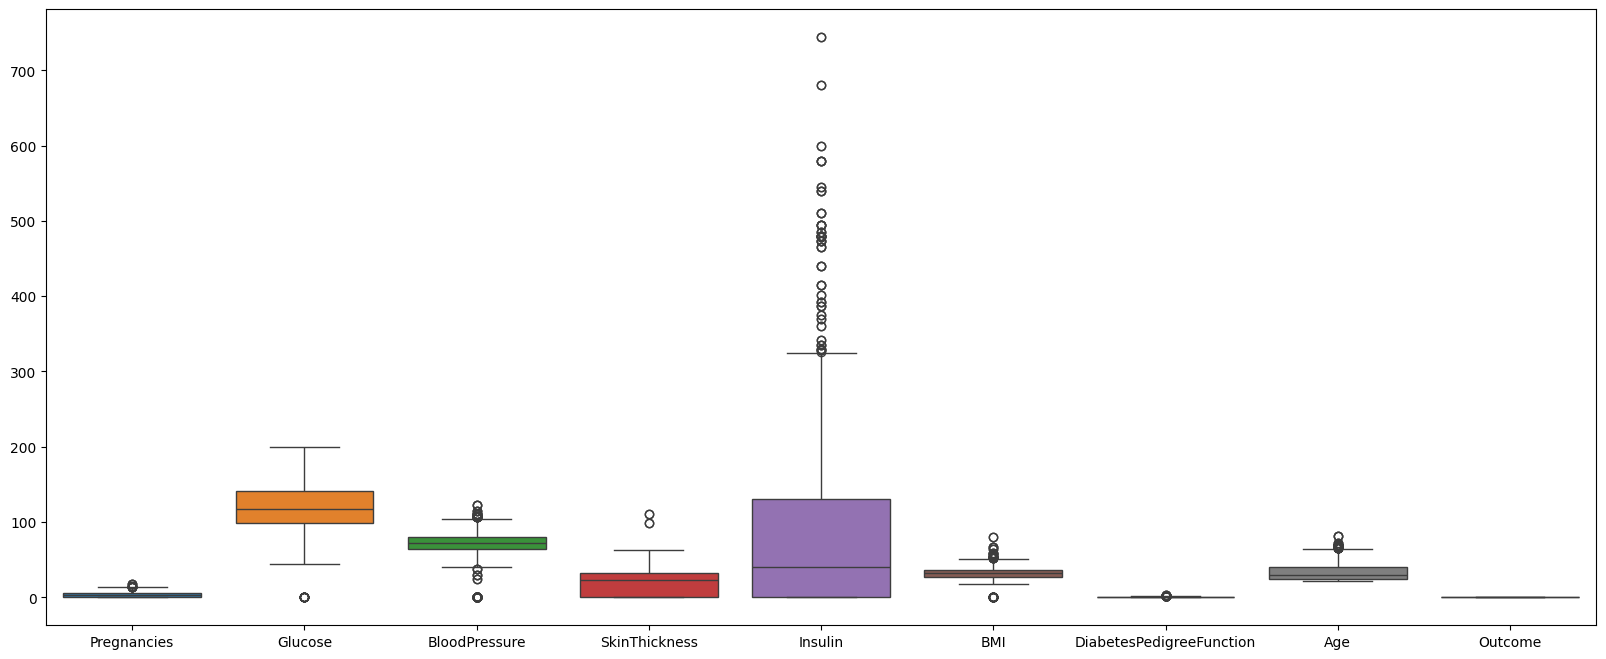

In [ ]:
plt.figure(figsize=(20, 8))
sb.boxplot(data= data)
plt.show()

In [ ]:
Q1 = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].quantile(0.25)
Q3 = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].quantile(0.75)
IQR = Q3 - Q1

outliers = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

data_without_outliers = data[~((data[outliers] < (Q1 - 1.5 * IQR)) | (data[outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]

data_without_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
...,...,...,...,...,...,...,...,...,...
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0


In [ ]:
data_without_outliers = data_without_outliers.reset_index()
data_without_outliers.drop(['index'],axis = 1,inplace = True)
data_without_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,135,68,42,250,42.3,0.365,24,1
3,0,173,78,32,265,46.5,1.159,58,0
4,4,99,72,17,0,25.6,0.294,28,0
...,...,...,...,...,...,...,...,...,...
1647,1,79,60,42,48,43.5,0.678,23,0
1648,2,75,64,24,55,29.7,0.370,33,0
1649,8,179,72,42,130,32.7,0.719,36,1
1650,6,85,78,0,0,31.2,0.382,42,0


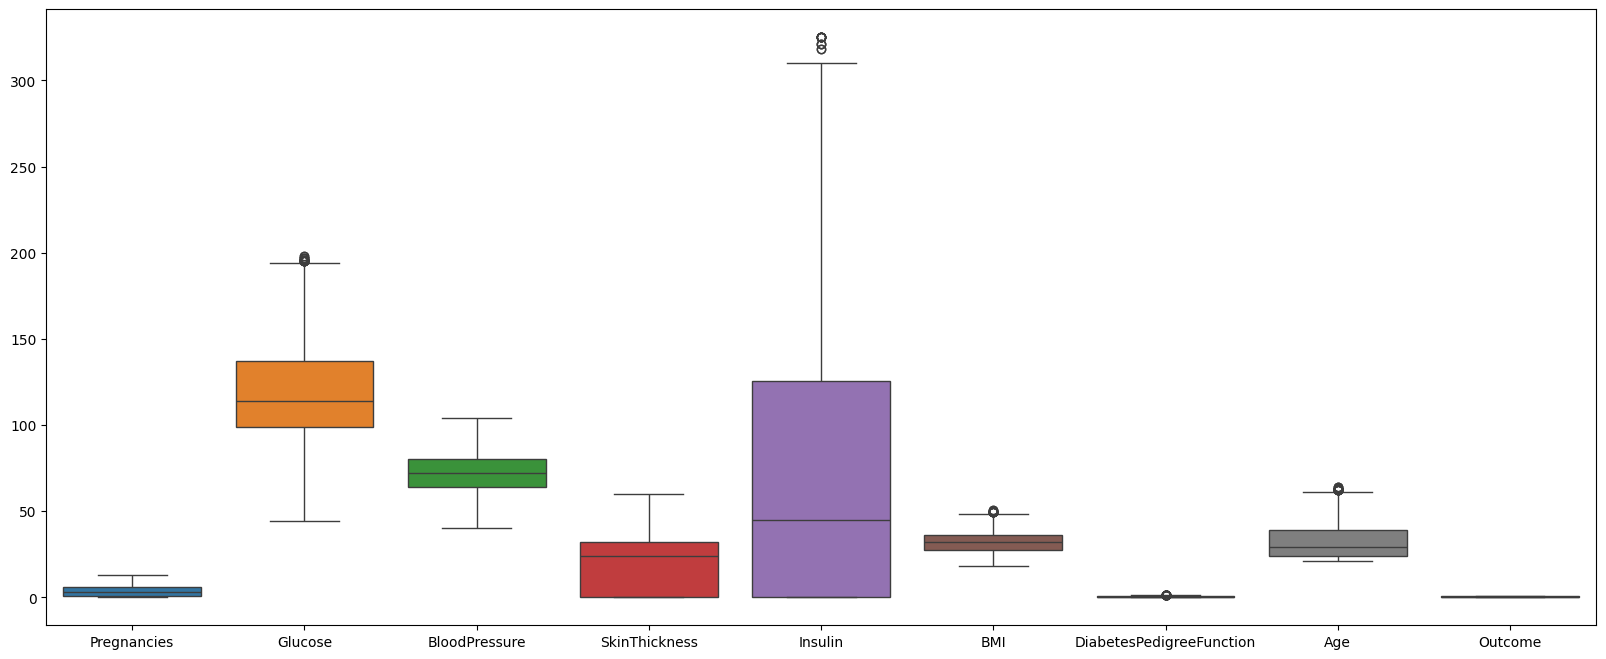

In [ ]:
plt.figure(figsize=(20, 8))
sb.boxplot(data= data_without_outliers)
plt.show()

In [ ]:
X = data_without_outliers.iloc[:,:-1]
y = data_without_outliers.iloc[:,-1]

In [ ]:
columns_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
X[columns_to_replace] = X[columns_to_replace].replace(0,np.nan)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35.0,NaN,33.6,0.127,47
1,0,84,82,31.0,125.0,38.2,0.233,23
2,0,135,68,42.0,250.0,42.3,0.365,24
3,0,173,78,32.0,265.0,46.5,1.159,58
4,4,99,72,17.0,NaN,25.6,0.294,28
...,...,...,...,...,...,...,...,...
1647,1,79,60,42.0,48.0,43.5,0.678,23
1648,2,75,64,24.0,55.0,29.7,0.370,33
1649,8,179,72,42.0,130.0,32.7,0.719,36
1650,6,85,78,NaN,NaN,31.2,0.382,42


In [ ]:
imputer = KNNImputer(n_neighbors=3)
X = imputer.fit_transform(X)
np.set_printoptions(threshold=sys.maxsize)
X

array([[2.00000000e+00, 1.38000000e+02, 6.20000000e+01, 3.50000000e+01,
        1.40000000e+02, 3.36000000e+01, 1.27000000e-01, 4.70000000e+01],
       [0.00000000e+00, 8.40000000e+01, 8.20000000e+01, 3.10000000e+01,
        1.25000000e+02, 3.82000000e+01, 2.33000000e-01, 2.30000000e+01],
       [0.00000000e+00, 1.35000000e+02, 6.80000000e+01, 4.20000000e+01,
        2.50000000e+02, 4.23000000e+01, 3.65000000e-01, 2.40000000e+01],
       [0.00000000e+00, 1.73000000e+02, 7.80000000e+01, 3.20000000e+01,
        2.65000000e+02, 4.65000000e+01, 1.15900000e+00, 5.80000000e+01],
       [4.00000000e+00, 9.90000000e+01, 7.20000000e+01, 1.70000000e+01,
        7.00000000e+01, 2.56000000e+01, 2.94000000e-01, 2.80000000e+01],
       [2.00000000e+00, 8.30000000e+01, 6.50000000e+01, 2.80000000e+01,
        6.60000000e+01, 3.68000000e+01, 6.29000000e-01, 2.40000000e+01],
       [2.00000000e+00, 8.90000000e+01, 9.00000000e+01, 3.00000000e+01,
        1.80000000e+02, 3.35000000e+01, 2.92000000e-01, 4.

In [ ]:
X_df = pd.DataFrame(X,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,138.0,62.0,35.000000,140.000000,33.6,0.127,47.0
1,0.0,84.0,82.0,31.000000,125.000000,38.2,0.233,23.0
2,0.0,135.0,68.0,42.000000,250.000000,42.3,0.365,24.0
3,0.0,173.0,78.0,32.000000,265.000000,46.5,1.159,58.0
4,4.0,99.0,72.0,17.000000,70.000000,25.6,0.294,28.0
...,...,...,...,...,...,...,...,...
1647,1.0,79.0,60.0,42.000000,48.000000,43.5,0.678,23.0
1648,2.0,75.0,64.0,24.000000,55.000000,29.7,0.370,33.0
1649,8.0,179.0,72.0,42.000000,130.000000,32.7,0.719,36.0
1650,6.0,85.0,78.0,27.333333,75.666667,31.2,0.382,42.0


In [ ]:
new_data = pd.concat([X_df,y],axis = 1)
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,138.0,62.0,35.000000,140.000000,33.6,0.127,47.0,1
1,0.0,84.0,82.0,31.000000,125.000000,38.2,0.233,23.0,0
2,0.0,135.0,68.0,42.000000,250.000000,42.3,0.365,24.0,1
3,0.0,173.0,78.0,32.000000,265.000000,46.5,1.159,58.0,0
4,4.0,99.0,72.0,17.000000,70.000000,25.6,0.294,28.0,0
...,...,...,...,...,...,...,...,...,...
1647,1.0,79.0,60.0,42.000000,48.000000,43.5,0.678,23.0,0
1648,2.0,75.0,64.0,24.000000,55.000000,29.7,0.370,33.0,0
1649,8.0,179.0,72.0,42.000000,130.000000,32.7,0.719,36.0,1
1650,6.0,85.0,78.0,27.333333,75.666667,31.2,0.382,42.0,0


In [ ]:
X = new_data.iloc[:,:-1].values
y = new_data.iloc[:,-1]

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[-5.16986560e-01,  6.43549107e-01, -9.00648040e-01,
         6.43712743e-01,  1.49605802e-01,  2.31347270e-01,
        -1.20774187e+00,  1.37827499e+00],
       [-1.14589805e+00, -1.20981249e+00,  9.21159922e-01,
         2.30683179e-01, -6.97916440e-02,  9.44177895e-01,
        -7.93661913e-01, -8.75161992e-01],
       [-1.14589805e+00,  5.40584574e-01, -3.54105652e-01,
         1.36651448e+00,  1.75852041e+00,  1.57952693e+00,
        -2.78015179e-01, -7.81268784e-01],
       [-1.14589805e+00,  1.84480199e+00,  5.56798329e-01,
         3.33940570e-01,  1.97791786e+00,  2.23037228e+00,
         2.82367805e+00,  2.41110027e+00],
       [ 1.11924925e-01, -6.94989822e-01,  1.02559407e-02,
        -1.21492030e+00, -8.74248947e-01, -1.00835817e+00,
        -5.55370619e-01, -4.05695954e-01],
       [-5.16986560e-01, -1.24413400e+00, -6.27376846e-01,
        -7.90889944e-02, -9.32754933e-01,  7.27229444e-01,
         7.53278287e-01, -7.81268784e-01],
       [-5.16986560e-01, -1.038204

In [ ]:
X_df = pd.DataFrame(X, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.516987,0.643549,-0.900648,0.643713,0.149606,0.231347,-1.207742,1.378275
1,-1.145898,-1.209812,0.921160,0.230683,-0.069792,0.944178,-0.793662,-0.875162
2,-1.145898,0.540585,-0.354106,1.366514,1.758520,1.579527,-0.278015,-0.781269
3,-1.145898,1.844802,0.556798,0.333941,1.977918,2.230372,2.823678,2.411100
4,0.111925,-0.694990,0.010256,-1.214920,-0.874249,-1.008358,-0.555371,-0.405696
...,...,...,...,...,...,...,...,...
1647,-0.831442,-1.381420,-1.082829,1.366514,-1.196032,1.765483,0.944693,-0.875162
1648,-0.516987,-1.518706,-0.718467,-0.492119,-1.093646,-0.373009,-0.258483,0.063770
1649,1.369748,2.050731,0.010256,1.366514,0.003341,0.091880,1.104856,0.345450
1650,0.740836,-1.175491,0.556798,-0.147927,-0.791365,-0.140564,-0.211606,0.908809


In [ ]:
Kernel_PCA = KernelPCA(n_components=4,random_state=42)
data_pca = Kernel_PCA.fit_transform(X_df)
data_pca

array([[ 6.01654487e-01,  5.78035255e-02, -3.67434035e-01,
        -1.24107699e+00],
       [-4.23313297e-01, -1.26075875e+00,  1.37736218e+00,
        -8.76039844e-01],
       [ 1.33443893e+00, -2.67337503e+00, -4.55212867e-02,
        -6.23262948e-01],
       [ 3.63453125e+00, -1.33215872e+00, -1.07345378e+00,
         2.47750572e+00],
       [-1.70893637e+00,  9.01004129e-01, -8.24371390e-02,
        -2.98736550e-01],
       [-1.16590255e+00, -7.32068024e-01,  1.34708137e+00,
         8.89403060e-01],
       [ 7.51678932e-01,  1.95425629e-01,  6.33416900e-01,
        -6.79291573e-01],
       [-3.09488806e-01,  2.10563953e-01,  1.16991138e+00,
        -1.13014614e+00],
       [ 8.91136193e-02,  9.03968504e-01, -8.14322549e-01,
         2.90791302e+00],
       [-9.25676196e-01,  7.18031391e-01, -2.41977837e-01,
        -4.29962546e-01],
       [-1.89333676e+00,  8.50290413e-02,  4.14698969e-01,
         7.02061798e-01],
       [ 1.76868931e+00,  1.85911691e+00, -1.97948186e+00,
      

In [ ]:
final_data = pd.DataFrame(data_pca,columns=['Feature_1','Feature_2','Feature_3','Feature_4'])
final_data = pd.concat([final_data,y],axis = 1)
final_data

,Feature_1,Feature_2,Feature_3,Feature_4,Outcome
0,0.601654,0.057804,-0.367434,-1.241077,1
1,-0.423313,-1.260759,1.377362,-0.876040,0
2,1.334439,-2.673375,-0.045521,-0.623263,1
3,3.634531,-1.332159,-1.073454,2.477506,0
4,-1.708936,0.901004,-0.082437,-0.298737,0
...,...,...,...,...,...
1647,-0.553867,-1.671019,2.518651,0.925516,0
1648,-1.775076,0.390360,0.888011,0.000081,0
1649,2.049475,0.407314,-0.486110,0.840052,1
1650,-0.160934,1.489150,1.071542,-0.061987,0


In [ ]:
X_data = final_data.iloc[:,:-1]
y_data = final_data.iloc[:,-1]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_data,y_data,test_size=0.25,random_state = 42)

In [ ]:
print(np.unique(y_train,return_counts = True))

(array([0, 1]), array([863, 376]))


In [ ]:
ros = RandomOverSampler(random_state=42)

In [ ]:
X_train_ros , y_train_ros = ros.fit_resample(X_train,y_train)

In [ ]:
print(np.unique(y_train_ros,return_counts = True))

(array([0, 1]), array([863, 863]))


In [ ]:
param_dist = {
    'n_neighbors': [3,4,5,6,8,10],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute']
}

random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)

In [ ]:
random_search.fit(X_train_ros, y_train_ros)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 4, 5, 6, 8, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [ ]:
print(random_search.best_params_)

{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,algorithm = "auto",weights = "distance")

In [ ]:
knn = knn.fit(X_train_ros,y_train_ros)

In [ ]:
y_predict_train = knn.predict(X_train_ros)

In [ ]:
print(classification_report(y_true = y_train_ros,y_pred = y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       863

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



In [ ]:
print(accuracy_score(y_train_ros,y_predict_train))

1.0


In [ ]:
print(confusion_matrix(y_train_ros,y_predict_train))

[[863   0]
 [  0 863]]


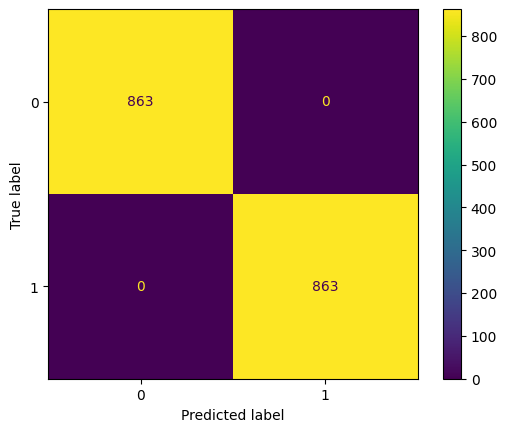

In [ ]:
confusion_matrix_train = confusion_matrix(y_train_ros,y_predict_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
y_predict_test = knn.predict(X_test)
y_predict_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [ ]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       273
           1       0.99      0.91      0.95       140

    accuracy                           0.97       413
   macro avg       0.97      0.95      0.96       413
weighted avg       0.97      0.97      0.97       413



In [ ]:
print(accuracy_score(y_test,y_predict_test))

0.9661016949152542


In [ ]:
print(confusion_matrix(y_test,y_predict_test))

[[272   1]
 [ 13 127]]


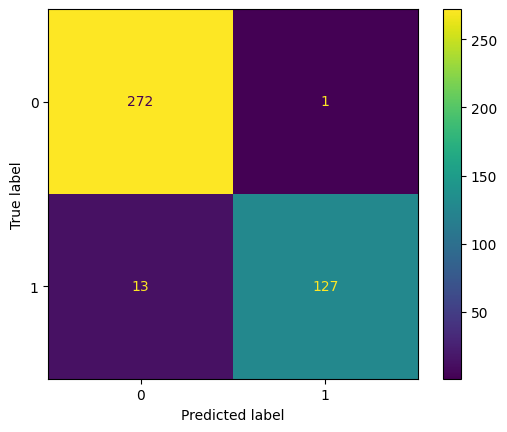

In [ ]:
confusion_matrix_test = confusion_matrix(y_test,y_predict_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr , tpr , threshold = roc_curve(y_test,y_pred_prob)

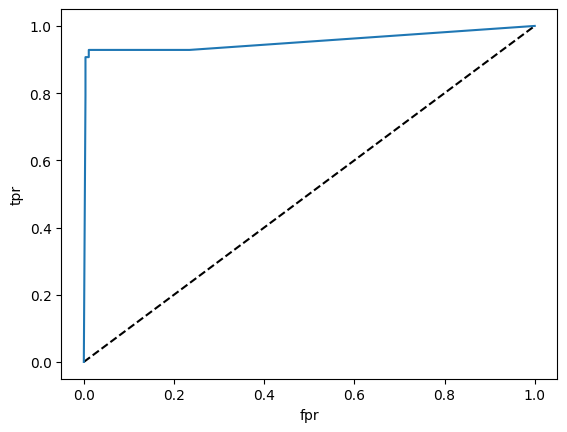

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,y_pred_prob)

0.953806907378336

In [ ]:
k_folds = KFold(n_splits=5)
cv_scores = cross_val_score(knn,X_train_ros,y_train_ros, cv = k_folds)

In [ ]:
summ = 0
for i in range(0,len(cv_scores)):
  summ += cv_scores[i]
print(f"mean accuracy is {round(summ / len(cv_scores),3)}")

mean accuracy is 0.961


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris

# بارگذاری داده‌ها
data = load_iris()
X, y = data.data, data.target

# تعریف مدل KNN
knn = KNeighborsClassifier()

# ایجاد pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # مرحله اول: نرمال‌سازی داده‌ها
    ('knn', KNeighborsClassifier())  # مرحله دوم: مدل KNN
])

# جستجوی مقدار بهینه k
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    pipeline.set_params(knn__n_neighbors=k)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# پیدا کردن مقدار بهینه k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

# آموزش مدل با مقدار بهینه k
pipeline.set_params(knn__n_neighbors=best_k)
pipeline.fit(X, y)

# ارزیابی مدل
print(f"Accuracy: {pipeline.score(X, y)}")


Best k: 6
Accuracy: 0.9666666666666667


In [ ]:
data = load_iris()
X, y = data.data, data.target

# تقسیم داده‌ها به مجموعه‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعریف مدل KNN
knn = KNeighborsClassifier()

# ایجاد pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # مرحله اول: نرمال‌سازی داده‌ها
    ('knn', knn)  # مرحله دوم: مدل KNN
])

# جستجوی مقدار بهینه k
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    pipeline.set_params(knn__n_neighbors=k)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# پیدا کردن مقدار بهینه k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

# آموزش مدل با مقدار بهینه k
pipeline.set_params(knn__n_neighbors=best_k)
pipeline.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های تست
y_pred = pipeline.predict(X_test)

# ارزیابی مدل با classification_report
report = classification_report(y_test, y_pred)
print(report)

Best k: 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

